## Importiere `pandas`, `matplotlib`

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import json
from datetime import datetime as dt
import locale
from scipy.interpolate import interp1d
from configparser import ConfigParser
from functions import *
from matplotlib.patches import Patch

## Lade die Konfigurationen aus `config.ini`
#### Definiere die Umgebung

In [63]:
config = ConfigParser()
files = config.read('config.ini')

# Wechsel des plt.style per config.ini machbar.
plt.style.use(config.get('theme', 'plt.style'))

# Damit Daten mit den deutschen Begriffen für die Monat generiert werden.
locale = locale.setlocale(locale.LC_TIME, "de_DE")

In [64]:
env = 'final'
database_file = config.get(env, 'database_file')
date_begin = config.get(env, 'date_begin')
date_end = config.get(env, 'date_end')
dpi = config.get(env, 'dpi')

In [65]:
df = pd.read_json(database_file)

#### Filter die Artikel nach: Sind zwischen dem und dem Datum veröffentlich worden.

In [66]:
df = df.loc[(df['date'] >= date_begin) & (df['date'] <= date_end)]

In [67]:
df['date'] = pd.to_datetime(df['date'], utc=True)

#### Erstelle drei neue Features: Wochentag, Wochentag beim Namen, Stunde des Tages

In [68]:
# Erstellt eine neue Zeile mit dem Wochentag
df['day_of_week'] = df['date'].dt.day_of_week
df['day_of_week_word'] = df['date'].dt.day_name(locale='de_de') 
df['hour'] = df['date'].dt.hour.astype("str") + " h"

In [69]:
df = df.groupby(["hour", "day_of_week"]).size().reset_index(name="amount")

In [70]:
df

,hour,day_of_week,amount
0,0 h,0,15
1,0 h,1,16
2,0 h,2,23
3,0 h,3,24
4,0 h,4,19
...,...,...,...
163,9 h,2,82
164,9 h,3,78
165,9 h,4,93
166,9 h,5,49


In [71]:
df

,hour,day_of_week,amount
0,0 h,0,15
1,0 h,1,16
2,0 h,2,23
3,0 h,3,24
4,0 h,4,19
...,...,...,...
163,9 h,2,82
164,9 h,3,78
165,9 h,4,93
166,9 h,5,49


/var/folders/bc/qptbbs8s5qb7xdt31yl10bnm0000gn/T/ipykernel_84843/3942841502.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  dfPivot = df.pivot("day_of_week", "hour", "amount")


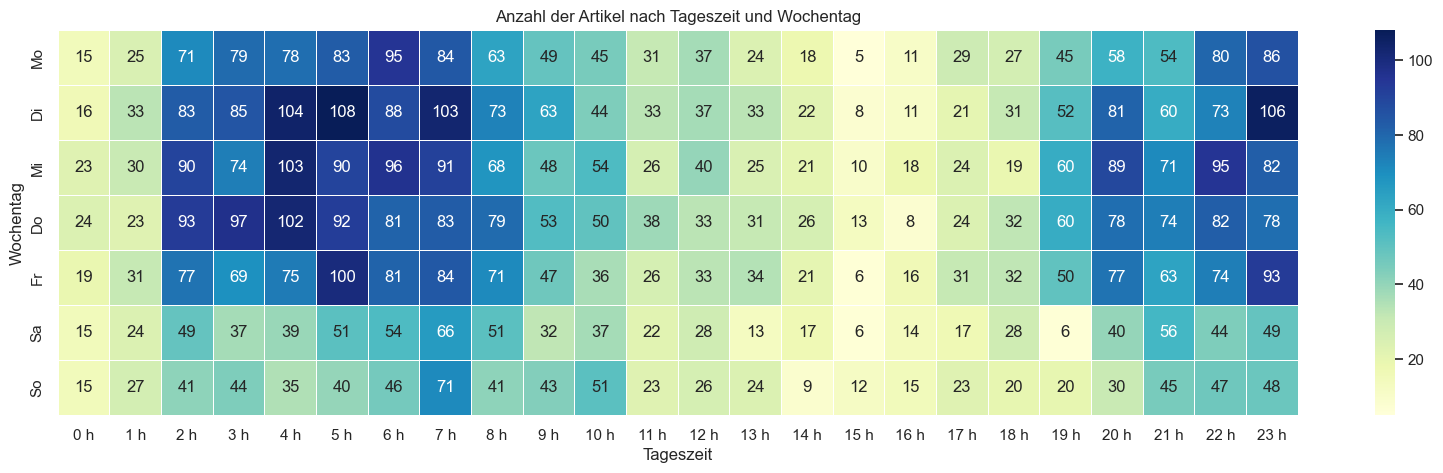

In [74]:
from importlib.resources import path
import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize':(20,5)})

dfPivot = df.pivot("day_of_week", "hour", "amount")

ax = sns.heatmap(dfPivot, linewidths=.5, annot=True, fmt="d", cmap="YlGnBu")

ax.set_title('Anzahl der Artikel nach Tageszeit und Wochentag')
ax.set_xlabel('Tageszeit')
ax.set_ylabel('Wochentag')
ax.set_yticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
ax.set_xticklabels((str(item) + ' h') for item in list(range(0, 24)))

ax.get_figure().savefig(f'figures/heat-day-time.png', bbox_inches="tight", dpi=float(dpi))